In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [87]:
df = pd.read_csv("datasets/diabetes_prediction_dataset.csv")
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [89]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [90]:
print(df.isna().value_counts())

gender  age    hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
False   False  False         False          False            False  False        False                False       100000
Name: count, dtype: int64


In [91]:
print(df['smoking_history'].value_counts())

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [92]:
print(df['gender'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [93]:
"""
Cleaning and prep data
"""

df['smoking_history'] = df['smoking_history'].map({'No Info': 0, 'never': 1,
                                                   'former': 2, 'current': 3,
                                                   'not current': 4, 'ever': 5})
print(df['smoking_history'].head())

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
print(df['gender'].head())

0    1
1    0
2    1
3    3
4    3
Name: smoking_history, dtype: int64
0    1
1    1
2    0
3    1
4    0
Name: gender, dtype: int64


In [94]:
"""
Clean data ready for EDA and training
"""

print(df.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                1  25.19   
1       1  54.0             0              0                0  27.32   
2       0  28.0             0              0                1  27.32   
3       1  36.0             0              0                3  23.45   
4       0  76.0             1              1                3  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


0        80.0
2        28.0
3        36.0
4        76.0
5        20.0
         ... 
99992    26.0
99993    40.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 64184, dtype: float64


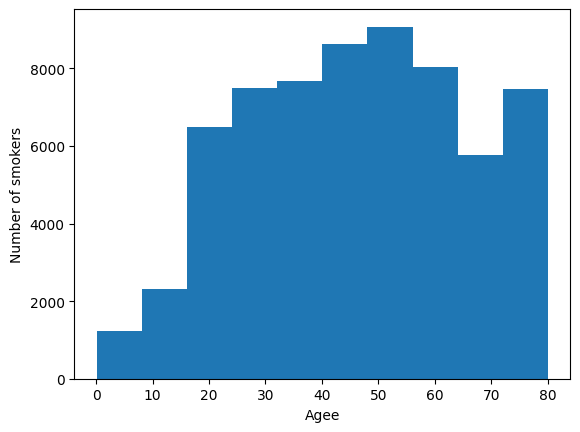

In [ ]:
# age_vs_hist = df.groupby('age')['smoking_history'].max().sort_values(ascending=False)
# print(df.loc[df['smoking_history'] >= 1, :])
smokers = df.loc[df['smoking_history'] >= 1, 'age']
print(smokers)
plt.hist(smokers, bins=10)
plt.xlabel('Age')
plt.ylabel('Number of smokers')
plt.show()
# print(age_vs_hist.head())              
# plt.plot(age_vs_hist)
# plt.title('Age vs Smoking History')
# plt.xlabel('Age')
# plt.ylabel('Number of People')
# plt.show()

# print(df['age'].sort_values(ascending=True))

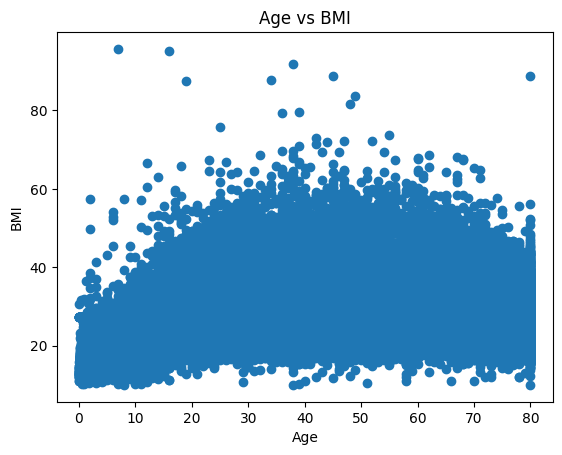

          age       bmi
age  1.000000  0.337396
bmi  0.337396  1.000000


In [96]:
plt.scatter(df['age'], df['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()
print(df[['age', 'bmi']].corr()
)

In [98]:
print(df.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                1  25.19   
1       1  54.0             0              0                0  27.32   
2       0  28.0             0              0                1  27.32   
3       1  36.0             0              0                3  23.45   
4       0  76.0             1              1                3  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [101]:
X = df.drop(columns='diabetes')
y = df['diabetes']

print(df.shape)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

(100000, 9)
(100000, 8) (100000,)


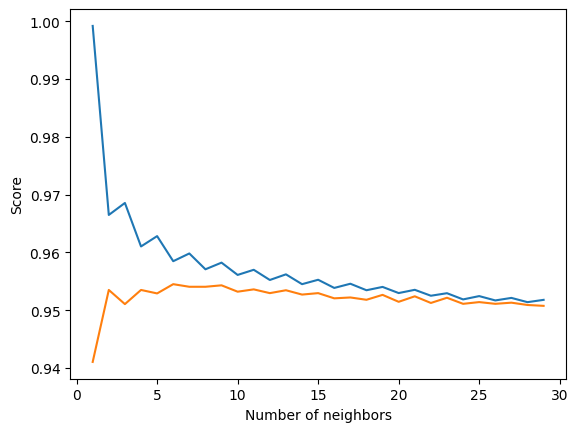

In [107]:
neighbors = range(1, 30)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.plot(neighbors, train_accuracies.values())
plt.plot(neighbors, test_accuracies.values())
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

In [120]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Accuracy:", 100 - mse * 100, "%")
print("Error:", mse * 100, "%")

Accuracy: 95.45 %
Error: 4.55 %
